N=10    | Systolic: 0.00002s | Bubble: 0.00001s
N=100   | Systolic: 0.00095s | Bubble: 0.00142s
N=1000  | Systolic: 0.21696s | Bubble: 0.18145s
N=5000  | Systolic: 4.66690s | Bubble: 5.37615s


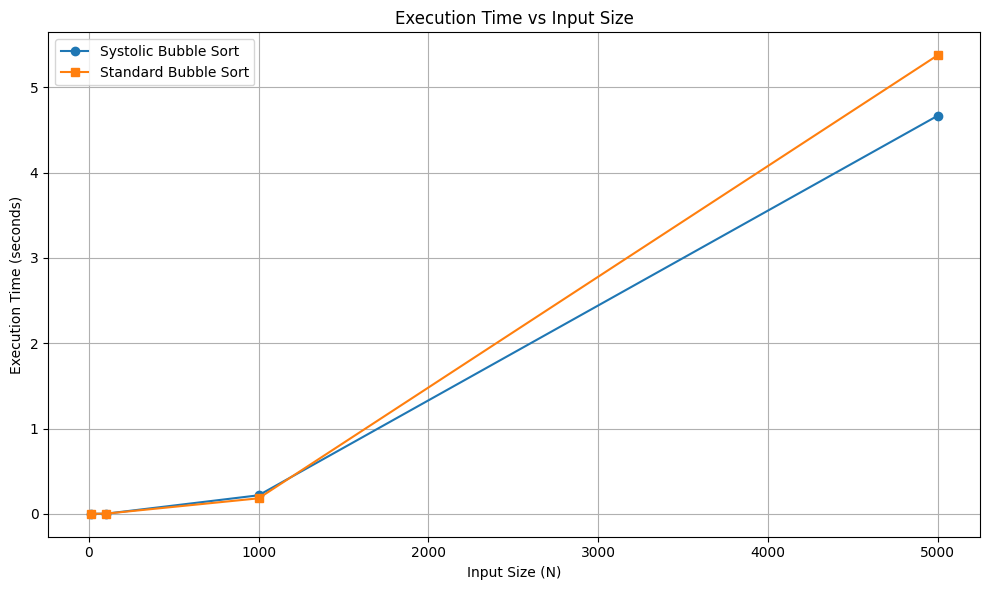

In [1]:
import random
import time
import matplotlib.pyplot as plt

def odd_even_transposition_sort(arr):
    """
    Systolic array-inspired Bubble Sort using Odd-Even Transposition method.
    Simulates each cycle of systolic processing.
    """
    n = len(arr)
    for step in range(n):
        # Even index phase
        if step % 2 == 0:
            for i in range(0, n - 1, 2):
                if arr[i] > arr[i + 1]:
                    arr[i], arr[i + 1] = arr[i + 1], arr[i]
        # Odd index phase
        else:
            for i in range(1, n - 1, 2):
                if arr[i] > arr[i + 1]:
                    arr[i], arr[i + 1] = arr[i + 1], arr[i]
    return arr

def standard_bubble_sort(arr):
    """
    Traditional sequential Bubble Sort for comparison.
    """
    n = len(arr)
    for i in range(n):
        for j in range(0, n - 1 - i):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

def benchmark_sorting_algorithms():
    input_sizes = [10, 100, 1000, 5000]  # You can add 10000 if runtime is acceptable
    systolic_times = []
    bubble_times = []

    for size in input_sizes:
        data = [random.randint(0, 100000) for _ in range(size)]

        # Time Odd-Even Systolic Sort
        data_systolic = data.copy()
        start = time.perf_counter()
        odd_even_transposition_sort(data_systolic)
        end = time.perf_counter()
        systolic_time = end - start

        # Time Standard Bubble Sort
        data_bubble = data.copy()
        start = time.perf_counter()
        standard_bubble_sort(data_bubble)
        end = time.perf_counter()
        bubble_time = end - start

        systolic_times.append(systolic_time)
        bubble_times.append(bubble_time)

        print(f"N={size:<5} | Systolic: {systolic_time:.5f}s | Bubble: {bubble_time:.5f}s")

    return input_sizes, systolic_times, bubble_times

def plot_results(sizes, systolic_times, bubble_times):
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, systolic_times, marker='o', label='Systolic Bubble Sort')
    plt.plot(sizes, bubble_times, marker='s', label='Standard Bubble Sort')
    plt.xlabel('Input Size (N)')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Execution Time vs Input Size')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    sizes, systolic_times, bubble_times = benchmark_sorting_algorithms()
    plot_results(sizes, systolic_times, bubble_times)
